<a href="https://colab.research.google.com/github/yuribp0107/Congreso_Tecnologos_medicos_2023/blob/main/carussel_mortalidad_cancer_chile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Libreria**

<p>En programación, una <strong>librería</strong> es una colección de código preescrito que nos permite reutilizar funciones para resolver tareas específicas sin tener que inventar la rueda cada vez. En este caso, estamos importando un kit de herramientas fundamental para la ciencia de datos: <code>numpy</code> y <code>pandas</code> se encargan del cálculo numérico y la manipulación de datos estructurados; <code>matplotlib</code> y <code>seaborn</code> nos permiten visualizar esa información a través de gráficos estáticos y estadísticos; mientras que el módulo de <code>google.colab</code> es la llave que conecta este entorno de programación directamente con tu almacenamiento en la nube de Google Drive.</p>

In [1]:
import seaborn as sns      # Carga la herramienta "Seaborn", que sirve para hacer gráficos y visualizaciones
                          # de datos de forma bonita y más fácil.

import pandas as pd        # Carga la herramienta "Pandas", que se usa para trabajar con tablas de datos,
                          # parecido a usar Excel pero dentro de Python.

import numpy as np         # Carga "NumPy", una herramienta para hacer cálculos numéricos y matemáticos
                          # de forma rápida (por ejemplo, trabajar con listas grandes de números).

import matplotlib.pyplot as plt  # Carga "Matplotlib", otra herramienta para hacer gráficos. Es más básica
                                 # que Seaborn, pero muy poderosa para dibujar casi cualquier tipo de gráfico.

from google.colab import drive   # Le dice a Python que queremos usar la parte de Colab que maneja Google Drive.

drive.mount('/content/drive')    # Conecta tu Google Drive al entorno de Google Colab. Es como “enchufar”
                                 # tu disco de Google Drive para poder leer y guardar archivos desde el código.

Mounted at /content/drive


##**DEIS**

In [2]:
"""
Script para:
1. Cargar bases de mortalidad DEIS 1990–2022 y 2023–2025.
2. Seleccionar columnas de interés.
3. Unificar ambos dataframes en uno solo.
4. Ordenar cronológicamente por año y fecha de defunción.
"""

import pandas as pd

# -------------------------------------------------------------------
# 1. Definir las rutas de los archivos CSV
# -------------------------------------------------------------------
file_path_1990_2022 = (
    "/content/drive/MyDrive/Base de datos Mortalidad/DEIS/"
    "DEFUNCIONES_FUENTE_DEIS_1990_2022_CIFRAS_OFICIALES.csv")

file_path_2023_2025 = (
    "/content/drive/MyDrive/Base de datos Mortalidad/DEIS/"
    "DEFUNCIONES_FUENTE_DEIS_2023_2026_04022026.csv"
)

# -------------------------------------------------------------------
# 2. Cargar los CSV desde Google Drive
#    Se usa ISO-8859-1 y separador ';' de acuerdo al formato del DEIS.
# -------------------------------------------------------------------
df_1990_2022 = pd.read_csv(
    file_path_1990_2022,
    encoding="ISO-8859-1",
    sep=";",
    engine="python",
)

df_2023_2025 = pd.read_csv(
    file_path_2023_2025,
    encoding="ISO-8859-1",
    sep=";",
    engine="python",
)

# -------------------------------------------------------------------
# 3. Filtrar la base 1990–2022 para quedarnos solo con 2018–2022
df_1990_2022 = df_1990_2022[df_1990_2022["AÑO"] >= 2018]

# -------------------------------------------------------------------
# 4. Seleccionar columnas de interés en cada dataframe
#    Se usa .copy() para trabajar con copias seguras.
# -------------------------------------------------------------------
columnas_interes = [
    "AÑO",
    "FECHA_DEF",
    "SEXO_NOMBRE",
    "EDAD_TIPO",
    "EDAD_CANT",
    "COD_COMUNA",
    "COMUNA",
    "NOMBRE_REGION",
    "DIAG1",
    "CAPITULO_DIAG1",
    "GLOSA_CAPITULO_DIAG1",
    "CODIGO_CATEGORIA_DIAG1",
    "LUGAR_DEFUNCION",
]

df_1990_2022_filter = df_1990_2022[columnas_interes].copy()
df_2023_2025_filter = df_2023_2025[columnas_interes].copy()

# -------------------------------------------------------------------
# 5. Concatenar ambos dataframes en uno solo
#    ignore_index=True rehace el índice para que sea continuo.
# -------------------------------------------------------------------
df_mortalidad = pd.concat(
    [df_1990_2022_filter, df_2023_2025_filter],
    axis=0,
    ignore_index=True,
)

# -------------------------------------------------------------------
# 6. Asegurar que la columna AÑO sea numérica
#    Esto evita problemas si el CSV la trae como texto.
# -------------------------------------------------------------------
df_mortalidad["AÑO"] = pd.to_numeric(
    df_mortalidad["AÑO"],
    errors="coerce",
)

# -------------------------------------------------------------------
# 7. Ordenar el dataframe unificado por AÑO y FECHA_DEF
#    FECHA_DEF suele venir como string 'YYYY-MM-DD', lo que permite
#    un orden cronológico correcto incluso sin convertir a datetime.
# -------------------------------------------------------------------
df_mortalidad = df_mortalidad.sort_values(
    by=["AÑO", "FECHA_DEF"],
    ascending=[True, True],
).reset_index(drop=True)

df_mortalidad

,AÑO,FECHA_DEF,SEXO_NOMBRE,EDAD_TIPO,EDAD_CANT,COD_COMUNA,COMUNA,NOMBRE_REGION,DIAG1,CAPITULO_DIAG1,GLOSA_CAPITULO_DIAG1,CODIGO_CATEGORIA_DIAG1,LUGAR_DEFUNCION
0,2018,2018-01-01,Hombre,1.0,28.0,8301.0,Los Ángeles,Del Bíobío,T751,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",T75,Otro
1,2018,2018-01-01,Hombre,1.0,20.0,10105.0,Frutillar,De Los Lagos,S069,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",S06,Otro
2,2018,2018-01-01,Hombre,1.0,1.0,4101.0,La Serena,De Coquimbo,T751,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",T75,Otro
3,2018,2018-01-01,Hombre,1.0,29.0,5801.0,Quilpué,De Valparaíso,T71X,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",T71,Otro
4,2018,2018-01-01,Hombre,1.0,30.0,13110.0,La Florida,Metropolitana de Santiago,T141,S00-T98,"Traumatismos, envenenamientos y algunas otras ...",T14,Otro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002730,2026,2026-02-01,Mujer,1.0,69.0,13124.0,Pudahuel,Metropolitana de Santiago,C349,C00-D48,Tumores [Neoplasias],C34,Casa habitación
1002731,2026,2026-02-01,Mujer,1.0,97.0,13129.0,San Joaquín,Metropolitana de Santiago,I10X,I00-I99,Enfermedades del sistema circulatorio,I10,Casa habitación
1002732,2026,2026-02-01,Mujer,1.0,94.0,13201.0,Puente Alto,Metropolitana de Santiago,C509,C00-D48,Tumores [Neoplasias],C50,Casa habitación
1002733,2026,2026-02-01,Mujer,1.0,73.0,13303.0,Tiltil,Metropolitana de Santiago,25,NaN,NaN,NaN,Casa habitación


####**Frecuencia de Causas de Defunción periodo 2018-2025**

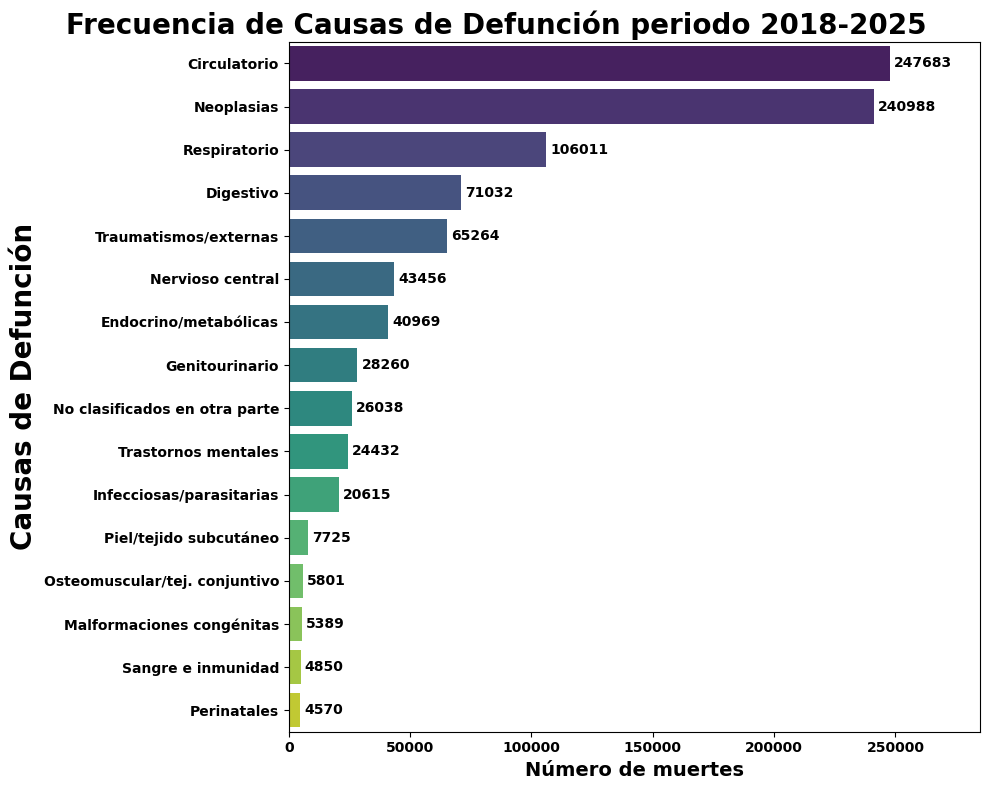

In [3]:
# 1. Configuración de etiquetas y limpieza de datos
# Diccionario para simplificar glosas extensas de la CIE-10
reemplazos = {
    "Traumatismos, envenenamientos y algunas otras consecuencias de causas externas": "Traumatismos, envenenamientos y causas externas",
    "Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte": "No clasificados en otra parte",
    "Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad": "Enfermedades de la sangre e inmunidad",
}

# Normalización de la columna de diagnósticos (string casting y remoción de espacios)
df_mortalidad["GLOSA_CAPITULO_DIAG1"] = (
    df_mortalidad["GLOSA_CAPITULO_DIAG1"]
    .astype("string")
    .str.strip()
)

# 2. Filtrado de categorías
# Exclusión de categorías no relevantes para este análisis específico o con baja incidencia
valores_excluir = [
    "Embarazo, parto y puerperio",
    "Enfermedades del oído y de la apófisis mastoides",
    "Enfermedades del ojo y sus anexos",
    "Códigos para propósitos especiales",
    "Causas externas de morbilidad y de mortalidad",
]

# Filtrar el DataFrame eliminando las categorías excluidas y valores nulos
df_mortalidad_filtrado = df_mortalidad[
    ~df_mortalidad["GLOSA_CAPITULO_DIAG1"].isin(valores_excluir)
    & df_mortalidad["GLOSA_CAPITULO_DIAG1"].notna()
].copy()

# 3. Procesamiento de frecuencias
# Cálculo de frecuencias por causa, aplicando reemplazos de nombres para legibilidad
conteo_causas = (
    df_mortalidad_filtrado["GLOSA_CAPITULO_DIAG1"]
    .value_counts()
    .rename(index=reemplazos)
    .reset_index()
)

conteo_causas.columns = ["Causa de Defunción", "Frecuencia"]

# Mapeo de nombres cortos para optimizar la visualización en el eje Y del gráfico
abreviaciones_causas = {
    "Enfermedades del sistema circulatorio": "Circulatorio",
    "Tumores [Neoplasias]": "Neoplasias",
    "Enfermedades del sistema respiratorio": "Respiratorio",
    "Enfermedades del sistema digestivo": "Digestivo",
    "Traumatismos, envenenamientos y causas externas": "Traumatismos/externas",
    "Enfermedades del sistema nervioso central": "Nervioso central",
    "Enfermedades endocrinas, nutricionales y metabólicas": "Endocrino/metabólicas",
    "Enfermedades del sistema genitourinario": "Genitourinario",
    "no clasificados en otra parte": "No clasificados",
    "Trastornos mentales y del comportamiento": "Trastornos mentales",
    "Ciertas enfermedades infecciosas y parasitarias": "Infecciosas/parasitarias",
    "Enfermedades de la piel y del tejido subcutáneo": "Piel/tejido subcutáneo",
    "Enfermedades del sistema osteomuscular y del tejido conjuntivo": "Osteomuscular/tej. conjuntivo",
    "Malformaciones congénitas, deformidades y anomalías cromosómicas": "Malformaciones congénitas",
    "Enfermedades de la sangre e inmunidad": "Sangre e inmunidad",
    "Ciertas afecciones originadas en el período perinatal": "Perinatales",
}

conteo_causas["Causa corta"] = (
    conteo_causas["Causa de Defunción"]
    .map(abreviaciones_causas)
    .fillna(conteo_causas["Causa de Defunción"])
)

# Ordenar los datos para una representación visual descendente
conteo_causas = conteo_causas.sort_values(by="Frecuencia", ascending=False)

# 4. Visualización de datos
plt.figure(figsize=(10, 8))

ax = sns.barplot(
    x="Frecuencia",
    y="Causa corta",
    data=conteo_causas,
    hue="Causa corta",
    palette="viridis",
    legend=False,
)

# Inserción de etiquetas de datos (frecuencia absoluta) al final de cada barra
for container in ax.containers:
    ax.bar_label(
        container,
        fmt='%d',
        padding=3,
        fontweight='bold',
        fontsize=10
    )

# Ajuste del límite del eje X para dar espacio a las etiquetas de texto
max_valor = conteo_causas["Frecuencia"].max()
plt.xlim(0, max_valor * 1.15)

# Configuración de títulos, etiquetas de ejes y estilos de fuente
plt.title(
    "Frecuencia de Causas de Defunción periodo 2018-2025",
    fontweight="bold",
    fontsize=20,
    x=0.3
)
plt.xlabel("Número de muertes", fontsize=14, fontweight="bold")
plt.ylabel("Causas de Defunción", fontweight="bold", fontsize=20)

plt.yticks(fontweight="bold")
plt.xticks(fontweight="bold")

# Exportación del gráfico en alta resolución
plt.tight_layout()
plt.savefig("frecuencia_causas_defuncion.png", dpi=300, bbox_inches='tight')
plt.show()

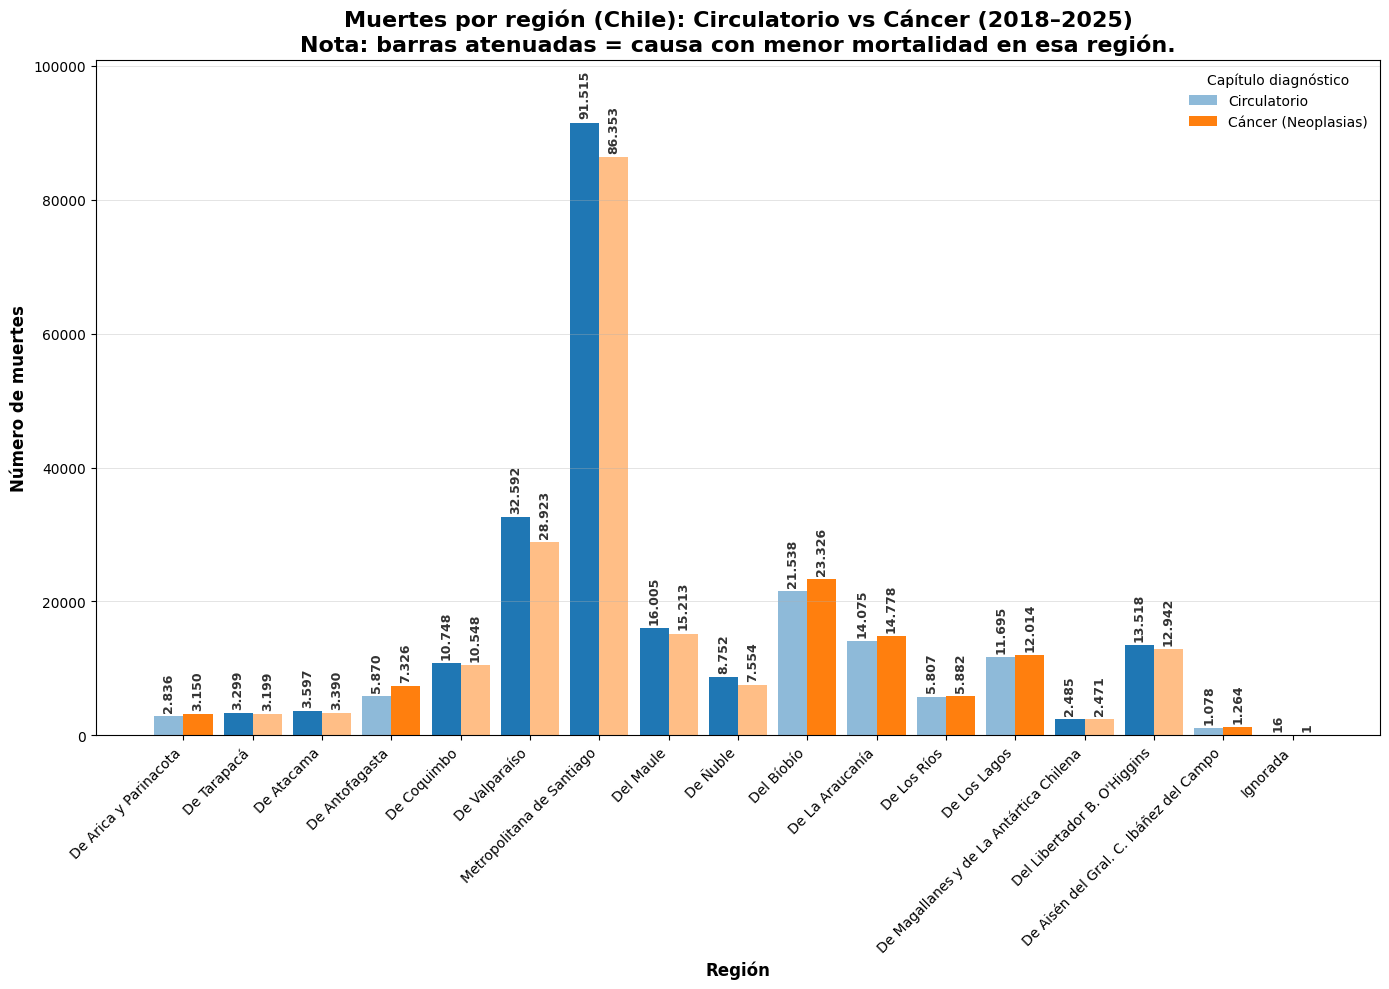

In [4]:
# ============================================================
# Chile (DEIS): comparación regional de defunciones
# Capítulos diagnósticos: Circulatorio vs Tumores (Neoplasias)
# Período: 2018–2025
# Orden del eje X: Norte → Sur (según `region_rank`)
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import unicodedata

# -------------------------------
# Parámetros (ajustables)
# -------------------------------
year_min, year_max = 2018, 2025

# Etiquetas EXACTAS tal como aparecen en DEIS (columna: GLOSA_CAPITULO_DIAG1)
CAUSA_CIRC = "Enfermedades del sistema circulatorio"
CAUSA_CA   = "Tumores [Neoplasias]"

# Mapeo a etiquetas cortas para el gráfico
map_causas = {
    CAUSA_CIRC: "Circulatorio",
    CAUSA_CA:   "Cáncer (Neoplasias)"
}

# -------------------------------
# Funciones auxiliares
# -------------------------------
def _norm_region(s: str) -> str:
    """
    Normaliza el nombre de una región para facilitar el matching con `region_rank`:
    - minúsculas
    - sin tildes/diacríticos
    - espacios simples
    - elimina prefijos iniciales "de"/"del" (si existen)
    """
    s = str(s).strip().lower()
    s = "".join(
        c for c in unicodedata.normalize("NFKD", s)
        if not unicodedata.combining(c)
    )
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"^(de|del)\s+", "", s)
    return s

# Orden Norte → Sur (ranking manual para ordenar el eje X)
# Nota: valida que la numeración sea consistente (sin duplicados) y que cubra todas las regiones presentes en el dataset.
region_rank = {
    "tarapaca": 2,
    "antofagasta": 3,
    "atacama": 3,
    "coquimbo": 4,
    "valparaiso": 5,
    "libertador general bernardo o'higgins": 7,
    "maule": 8,
    "biobio": 10,
    "la araucania": 11,
    "los lagos": 13,
    "aysen del general carlos ibanez del campo": 14,
    "magallanes y de la antartica chilena": 15,
    "metropolitana de santiago": 6,
    "los rios": 12,
    "arica y parinacota": 1,
    "nuble": 9,
}

# -------------------------------
# 1) Tomar el dataframe ya filtrado por categorías DEIS
#    Requisito: debe existir `df_mortalidad_filtrado`
# -------------------------------
df_plot = df_mortalidad_filtrado.copy()

# Asegurar año numérico y filtrar: período + región no nula + solo las 2 causas objetivo
df_plot["AÑO"] = pd.to_numeric(df_plot["AÑO"], errors="coerce")

df_plot = df_plot[
    df_plot["AÑO"].between(year_min, year_max)
    & df_plot["NOMBRE_REGION"].notna()
    & df_plot["GLOSA_CAPITULO_DIAG1"].isin([CAUSA_CIRC, CAUSA_CA])
].copy()

# Etiqueta corta de causa (para columnas/leyenda del gráfico)
df_plot["CAUSA"] = df_plot["GLOSA_CAPITULO_DIAG1"].map(map_causas)

# -------------------------------
# 2) Conteo por Región × Causa
# -------------------------------
tabla_region = (
    df_plot
    .groupby(["NOMBRE_REGION", "CAUSA"])
    .size()
    .reset_index(name="Muertes")
)

# Pivot: filas = región, columnas = causa, valores = conteo de muertes
pivot = (
    tabla_region
    .pivot(index="NOMBRE_REGION", columns="CAUSA", values="Muertes")
    .fillna(0)
    .astype(int)
)

# Asegurar columnas (por si en alguna región no existe una de las causas en el período)
for col in ["Circulatorio", "Cáncer (Neoplasias)"]:
    if col not in pivot.columns:
        pivot[col] = 0

# Fijar orden de columnas (consistente en todas las ejecuciones)
pivot = pivot[["Circulatorio", "Cáncer (Neoplasias)"]]

# -------------------------------
# 3) Ordenar el eje X según ranking Norte → Sur
# -------------------------------
rank_series = pivot.index.to_series().map(lambda r: region_rank.get(_norm_region(r), 999))

pivot = (
    pivot.assign(_rank=rank_series)
         .sort_values("_rank")
         .drop(columns="_rank")
)

# -------------------------------
# 4) Gráfico: barras lado a lado + atenuación del menor + etiquetas numéricas
# -------------------------------
regions = pivot.index.tolist()
x = np.arange(len(regions))
width = 0.42

fig, ax = plt.subplots(figsize=(14, 10))

# 4.1 Barras (guardamos las referencias para modificar alpha y rotular valores)
color_circ = 'tab:blue'
color_ca   = 'tab:orange'

rects_circ = ax.bar(
    x - width/2, pivot["Circulatorio"].values, width,
    label="Circulatorio", color=color_circ
)

rects_ca = ax.bar(
    x + width/2, pivot["Cáncer (Neoplasias)"].values, width,
    label="Cáncer (Neoplasias)", color=color_ca
)

# 4.2 Lógica de atenuación:
#     en cada región, se atenúa (alpha=0.5) la causa con MENOR número de muertes
vals_circ = pivot["Circulatorio"].values
vals_ca   = pivot["Cáncer (Neoplasias)"].values

for i in range(len(regions)):
    val_c = vals_circ[i]
    val_n = vals_ca[i]

    if val_c < val_n:
        rects_circ[i].set_alpha(0.5)
    elif val_n < val_c:
        rects_ca[i].set_alpha(0.5)
    # Si son iguales, no se atenúa ninguna (ambas quedan con alpha=1.0)

# -------------------------------
# 4.3 Etiquetas numéricas verticales sobre cada barra
# -------------------------------
fmt_miles = lambda x: f"{int(x):,}".replace(",", ".")

ax.bar_label(
    rects_circ,
    labels=[fmt_miles(v) for v in vals_circ],
    padding=3, fontsize=9, fontweight='bold', color='#333333',
    rotation=90  # etiquetas en orientación vertical
)

ax.bar_label(
    rects_ca,
    labels=[fmt_miles(v) for v in vals_ca],
    padding=3, fontsize=9, fontweight='bold', color='#333333',
    rotation=90  # etiquetas en orientación vertical
)

# -------------------------------
# 5) Estética y exportación
# -------------------------------
ax.set_title(
    f"Muertes por región (Chile): Circulatorio vs Cáncer ({year_min}–{year_max})\n"
    "Nota: barras atenuadas = causa con menor mortalidad en esa región.",
    fontsize=16, fontweight="bold"
)
ax.set_xlabel("Región", fontsize=12, fontweight="bold")
ax.set_ylabel("Número de muertes", fontsize=12, fontweight="bold")

ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha="right")

# Aumentar el techo del eje Y para que las etiquetas verticales no queden “cortadas”
ax.set_ylim(top=ax.get_ylim()[1] * 1.05)

ax.legend(title="Capítulo diagnóstico", frameon=False)
ax.grid(axis="y", linewidth=0.6, alpha=0.4)

plt.savefig(
    "Muertes por región (Chile): Circulatorio vs Cáncer.png",
    dpi=300, bbox_inches='tight'
)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1091554586.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["REGION_STD", "GRUPO_CAUSA"])


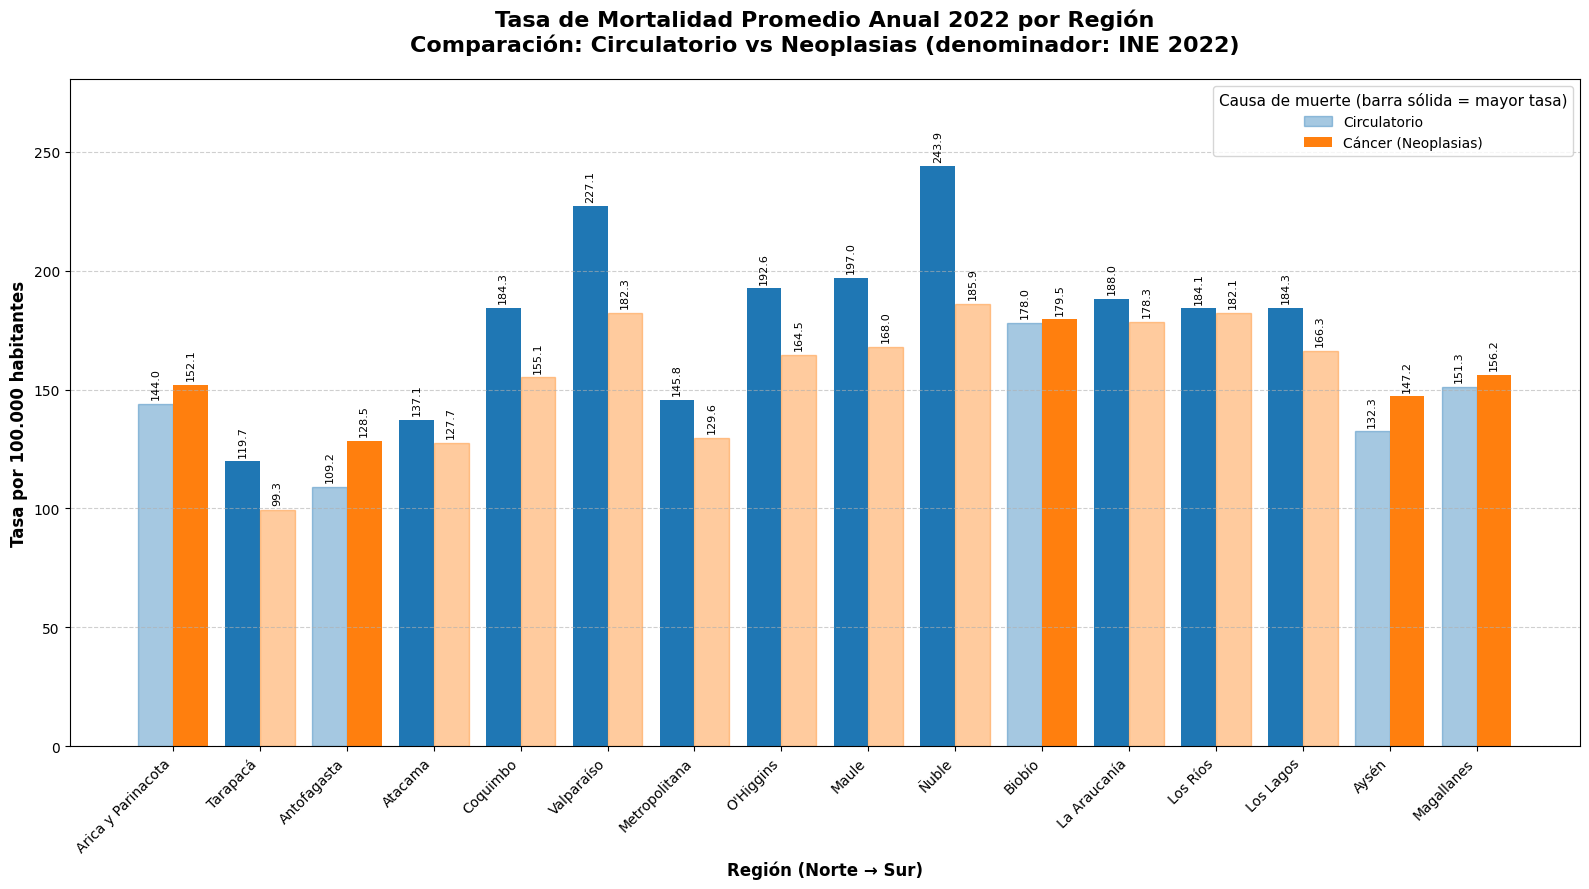

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =========================
# 0) Parámetros
# =========================
# Ventana temporal a analizar (inclusive)
YEAR_START, YEAR_END = 2022, 2022
ANIOS = YEAR_END - YEAR_START + 1  # número de años incluidos en el período

# Orden explícito Norte → Sur (se usa para ordenar el eje X y tablas)
orden_regiones = [
    "Arica y Parinacota",
    "Tarapacá",
    "Antofagasta",
    "Atacama",
    "Coquimbo",
    "Valparaíso",
    "Metropolitana",
    "O'Higgins",
    "Maule",
    "Ñuble",
    "Biobío",
    "La Araucanía",
    "Los Ríos",
    "Los Lagos",
    "Aysén",
    "Magallanes",
]

# Denominadores oficiales INE (población proyectada al 30-jun-2022; Tabla 1 Anuario 2022)
pob_2022 = {
    "Arica y Parinacota": 257722,
    "Tarapacá": 396697,
    "Antofagasta": 709637,
    "Atacama": 318004,
    "Coquimbo": 858769,
    "Valparaíso": 1995538,
    "Metropolitana": 8310984,
    "O'Higgins": 1009552,
    "Maule": 1153043,
    "Ñuble": 517060,
    "Biobío": 1676269,
    "La Araucanía": 1024029,
    "Los Ríos": 409559,
    "Los Lagos": 902510,
    "Aysén": 108047,
    "Magallanes": 181143,
}

# =========================
# 1) Preparar datos DEIS (numeradores)
# =========================
# Requisito: df_mortalidad debe existir y estar cargado previamente
df = df_mortalidad.copy()

# Asegurar que el año sea numérico y filtrar al período definido
df["AÑO"] = pd.to_numeric(df["AÑO"], errors="coerce")
df = df[df["AÑO"].between(YEAR_START, YEAR_END)].copy()

# Mantener solo 2 grandes grupos (capítulos CIE-10): circulatorio vs neoplasias
mapa_causas = {
    "I00-I99": "Circulatorio",
    "C00-D48": "Neoplasias",
}
df["GRUPO_CAUSA"] = df["CAPITULO_DIAG1"].map(mapa_causas)
df = df[df["GRUPO_CAUSA"].notna()].copy()

# Normalización “pragmática” de nombres regionales (DEIS → etiqueta corta consistente)
def normaliza_region(x: str):
    """
    Convierte variantes de nombres regionales (tildes, prefijos largos, grafías alternas)
    a una etiqueta estándar que calza con `orden_regiones` y `pob_2022`.
    """
    if pd.isna(x):
        return np.nan

    s = str(x).strip()

    # Casos frecuentes en DEIS (mapeo por substring)
    if "Metropolitana" in s:
        return "Metropolitana"
    if "O'Higgins" in s or "OHiggins" in s:
        return "O'Higgins"
    if "Bíobío" in s or "Biobio" in s:
        return "Biobío"
    if "Araucanía" in s or "Araucania" in s:
        return "La Araucanía"
    if "Los Ríos" in s or "Los Rios" in s:
        return "Los Ríos"
    if "Los Lagos" in s:
        return "Los Lagos"
    if "Tarapac" in s:
        return "Tarapacá"
    if "Ays" in s or "Ais" in s:
        return "Aysén"
    if "Magallanes" in s:
        return "Magallanes"

    # Quitar prefijos administrativos típicos ("De", "Del", "De la", etc.)
    for pref in ["Del ", "De la ", "De los ", "De las ", "De "]:
        if s.startswith(pref):
            s = s[len(pref):].strip()
            break

    return s

df["REGION_STD"] = df["NOMBRE_REGION"].apply(normaliza_region)

# Enforzar el orden Norte → Sur para tablas y gráficos
df["REGION_STD"] = pd.Categorical(df["REGION_STD"], categories=orden_regiones, ordered=True)

# =========================
# 2) Conteos por región × causa (numeradores del período)
# =========================
tabla_conteos = (
    df.groupby(["REGION_STD", "GRUPO_CAUSA"])
      .size()
      .reset_index(name="Muertes_periodo")
      .sort_values(["REGION_STD", "GRUPO_CAUSA"])
)

# =========================
# 3) Tasa promedio anual aproximada por 100.000 (denominador: INE 2022)
#    Fórmula: Muertes_periodo / (Pob_2022 * #años) * 100.000
# =========================
df_pob = pd.DataFrame({"REGION_STD": list(pob_2022.keys()), "POB_2022": list(pob_2022.values())})
df_pob["REGION_STD"] = pd.Categorical(df_pob["REGION_STD"], categories=orden_regiones, ordered=True)

tabla = tabla_conteos.merge(df_pob, on="REGION_STD", how="left")
tabla["Tasa100k_prom_anual_aprox"] = (tabla["Muertes_periodo"] / (tabla["POB_2022"] * ANIOS)) * 100000

# =========================
# 4) Preparación para graficar (pivot)
# =========================
df_tasa_pivot = tabla.pivot(
    index="REGION_STD",
    columns="GRUPO_CAUSA",
    values="Tasa100k_prom_anual_aprox"
)

# =========================
# 5) Gráfico: tasas con “highlight” del dominante + etiquetas numéricas
# =========================
regions = df_tasa_pivot.index.tolist()
x = np.arange(len(regions))
width = 0.40

fig, ax = plt.subplots(figsize=(16, 9))  # más ancho para acomodar las etiquetas verticales

col_circ = "tab:blue"
col_neo  = "tab:orange"

# 5.1 Dibujar barras base y guardar referencias (para alpha y rotulación)
rects_circ = ax.bar(
    x - width/2, df_tasa_pivot["Circulatorio"], width,
    label="Circulatorio", color=col_circ
)
rects_neo = ax.bar(
    x + width/2, df_tasa_pivot["Neoplasias"], width,
    label="Cáncer (Neoplasias)", color=col_neo
)

# 5.2 Lógica de transparencia:
#     para cada región, se atenúa (alpha=0.4) la causa con MENOR tasa
vals_c = df_tasa_pivot["Circulatorio"].values
vals_n = df_tasa_pivot["Neoplasias"].values

# Máximo global (ignora NaN) para definir el techo del eje Y
max_val = max(np.nanmax(vals_c), np.nanmax(vals_n))

for i in range(len(regions)):
    v_c = vals_c[i]
    v_n = vals_n[i]

    # --- Atenuación del menor ---
    if v_c < v_n:
        rects_circ[i].set_alpha(0.4)
        rects_circ[i].set_edgecolor(col_circ)
    elif v_n < v_c:
        rects_neo[i].set_alpha(0.4)
        rects_neo[i].set_edgecolor(col_neo)
    # Si son iguales, no se atenúa ninguna (ambas quedan con alpha=1.0)

    # --- Etiquetas numéricas (verticales) ---
    # Circulatorio
    ax.text(
        x[i] - width/2,     # X: centro de la barra azul
        v_c + 2,            # Y: pequeño “offset” sobre la barra
        f"{v_c:.1f}",       # 1 decimal
        ha="center", va="bottom",
        fontsize=8, color="black",
        rotation=90
    )

    # Neoplasias
    ax.text(
        x[i] + width/2,     # X: centro de la barra naranja
        v_n + 2,
        f"{v_n:.1f}",
        ha="center", va="bottom",
        fontsize=8, color="black",
        rotation=90
    )

# 5.3 Cosmética del gráfico
ax.set_title(
    "Tasa de Mortalidad Promedio Anual 2022 por Región\n"
    "Comparación: Circulatorio vs Neoplasias (denominador: INE 2022)",
    fontsize=16, fontweight="bold", pad=20
)
ax.set_ylabel("Tasa por 100.000 habitantes", fontsize=12, fontweight="bold")
ax.set_xlabel("Región (Norte → Sur)", fontsize=12, fontweight="bold")

ax.set_xticks(x)
ax.set_xticklabels(regions, rotation=45, ha="right", fontsize=10)

# Aire superior para evitar que las etiquetas verticales queden recortadas
ax.set_ylim(0, max_val * 1.15)

ax.legend(
    title="Causa de muerte (barra sólida = mayor tasa)",
    title_fontsize=11, fontsize=10
)
ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.savefig("Tasa de Mortalidad Promedio Anual (2018–2022) por Región.png", dpi=300, bbox_inches="tight")
plt.show()


/tmp/ipython-input-1195823046.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1195823046.py:108: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.barplot(
/tmp/ipython-input-1195823046.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1195823046.py:138: UserWarning: The palette list has more values (13) than needed (10), which may not be intended.
  sns.barplot(


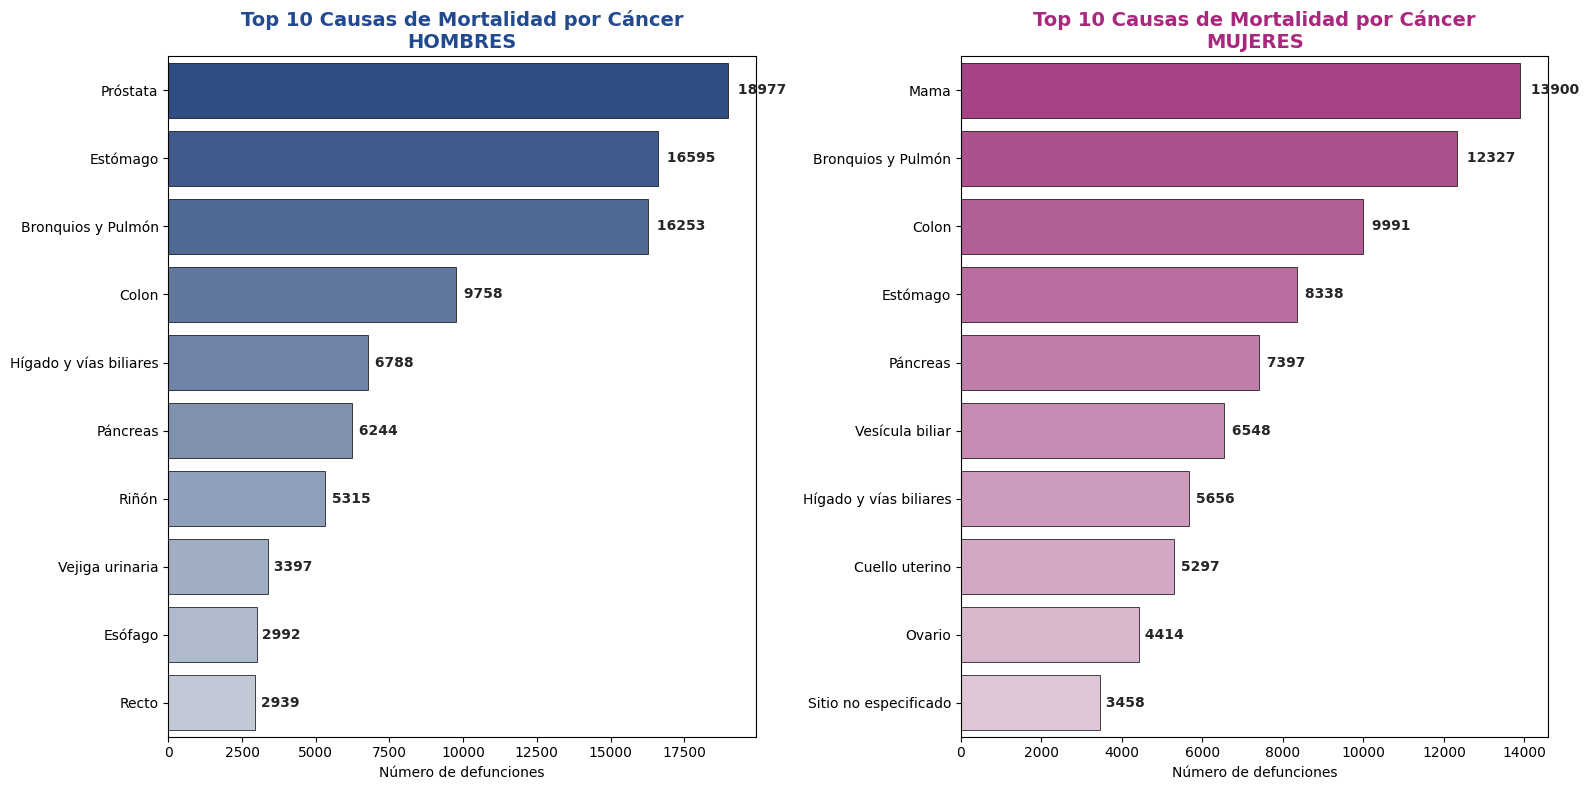

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------------------------------
# 0) Diccionario de mapeo CIE-10 (sitio primario / categoría) para cáncer
# -------------------------------------------------------------------------
# En mortalidad oncológica, los códigos CIE-10 suelen corresponder a sitio anatómico.
# Este diccionario prioriza los códigos más frecuentes en Chile para facilitar lectura.
# Si aparece un código no mapeado, el gráfico mostrará el código original (fallback).
cie10_names = {
    # --- Códigos añadidos / críticos para el perfil chileno ---
    "C15": "Esófago",
    "C23": "Vesícula biliar",        # relevante en Chile (especialmente en mujeres)
    "C80": "Sitio no especificado",  # indicador indirecto de calidad de registro/codificación

    # --- Diccionario base (cánceres frecuentes) ---
    "C16": "Estómago",
    "C18": "Colon",
    "C19": "Unión rectosigmoidea",
    "C20": "Recto",
    "C22": "Hígado y vías biliares",
    "C24": "Otras partes de las vías biliares",
    "C25": "Páncreas",
    "C32": "Laringe",
    "C33": "Tráquea",
    "C34": "Bronquios y Pulmón",
    "C43": "Melanoma de piel",
    "C44": "Otras neoplasias de piel",
    "C50": "Mama",
    "C53": "Cuello uterino",
    "C54": "Cuerpo uterino",
    "C56": "Ovario",
    "C61": "Próstata",
    "C62": "Testículo",
    "C64": "Riñón",
    "C67": "Vejiga urinaria",
    "C81": "Linfoma de Hodgkin",
    "C82": "Linfoma folicular",
    "C83": "Linfoma no folicular",
    "C85": "Linfoma no Hodgkin",
    "C90": "Mieloma múltiple",
    "C91": "Leucemia linfoide",
    "C92": "Leucemia mieloide",
    "C97": "Sitios múltiples",
    "D00": "Carcinoma in situ",
}



# -------------------------------------------------------------------------
# 1) Preparación de datos
# -------------------------------------------------------------------------
# Filtrar únicamente defunciones cuyo capítulo diagnóstico sea neoplasias (DEIS)
df_cancer = df_mortalidad[df_mortalidad["GLOSA_CAPITULO_DIAG1"] == "Tumores [Neoplasias]"].copy()

# Mapear código → nombre legible; si no existe en el diccionario, conservar el código
df_cancer["Nombre_Cancer"] = (
    df_cancer["CODIGO_CATEGORIA_DIAG1"]
    .map(cie10_names)
    .fillna(df_cancer["CODIGO_CATEGORIA_DIAG1"])
)


# -------------------------------------------------------------------------
# 2) Rankings Top-N por sexo
# -------------------------------------------------------------------------
def get_top_cancer(df: pd.DataFrame, sexo: str, n: int = 10) -> pd.DataFrame:
    """
    Retorna un ranking Top-N de causas específicas de muerte por cáncer para un sexo dado,
    usando conteos absolutos (value_counts) sobre la etiqueta ya mapeada (Nombre_Cancer).
    """
    subset = df[df["SEXO_NOMBRE"] == sexo]
    ranking = subset["Nombre_Cancer"].value_counts().head(n).reset_index()
    ranking.columns = ["Cáncer", "Muertes"]
    return ranking

top_hombres = get_top_cancer(df_cancer, "Hombre", n=10)
top_mujeres = get_top_cancer(df_cancer, "Mujer", n=10)

# -------------------------------------------------------------------------
# 3) Visualización comparativa (2 paneles)
# -------------------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=False)

# Estilo general (grilla blanca limpia)
sns.set_style("whitegrid")

# Paletas graduadas (estética clínica)
paleta_hombres = sns.light_palette("#224a8f", n_colors=13, reverse=True)  # azul
paleta_mujeres = sns.light_palette("#b5338a", n_colors=13, reverse=True)  # magenta

# -------------------------
# Panel 1: HOMBRES
# -------------------------
sns.barplot(
    data=top_hombres,
    y="Cáncer",
    x="Muertes",
    ax=axes[0],
    palette=paleta_hombres,
    edgecolor="black",
    linewidth=0.5,
)
axes[0].set_title(
    "Top 10 Causas de Mortalidad por Cáncer\nHOMBRES",
    fontsize=14, fontweight="bold", color="#224a8f"
)
axes[0].set_xlabel("Número de defunciones")
axes[0].set_ylabel("")  # sin etiqueta Y para reducir ruido visual

# Etiquetas numéricas al final de cada barra
for i, v in enumerate(top_hombres["Muertes"]):
    axes[0].text(
        v + (v * 0.01),  # pequeño offset proporcional
        i,
        f" {int(v)}",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

# -------------------------
# Panel 2: MUJERES
# -------------------------
sns.barplot(
    data=top_mujeres,
    y="Cáncer",
    x="Muertes",
    ax=axes[1],
    palette=paleta_mujeres,
    edgecolor="black",
    linewidth=0.5,
)
axes[1].set_title(
    "Top 10 Causas de Mortalidad por Cáncer\nMUJERES",
    fontsize=14, fontweight="bold", color="#a8287d"
)
axes[1].set_xlabel("Número de defunciones")
axes[1].set_ylabel("")

for i, v in enumerate(top_mujeres["Muertes"]):
    axes[1].text(
        v + (v * 0.01),
        i,
        f" {int(v)}",
        va="center",
        fontsize=10,
        fontweight="bold",
    )

plt.tight_layout()
plt.savefig("Top 10 Causas de Mortalidad por Cáncer.png", dpi=300, bbox_inches="tight")
plt.show()


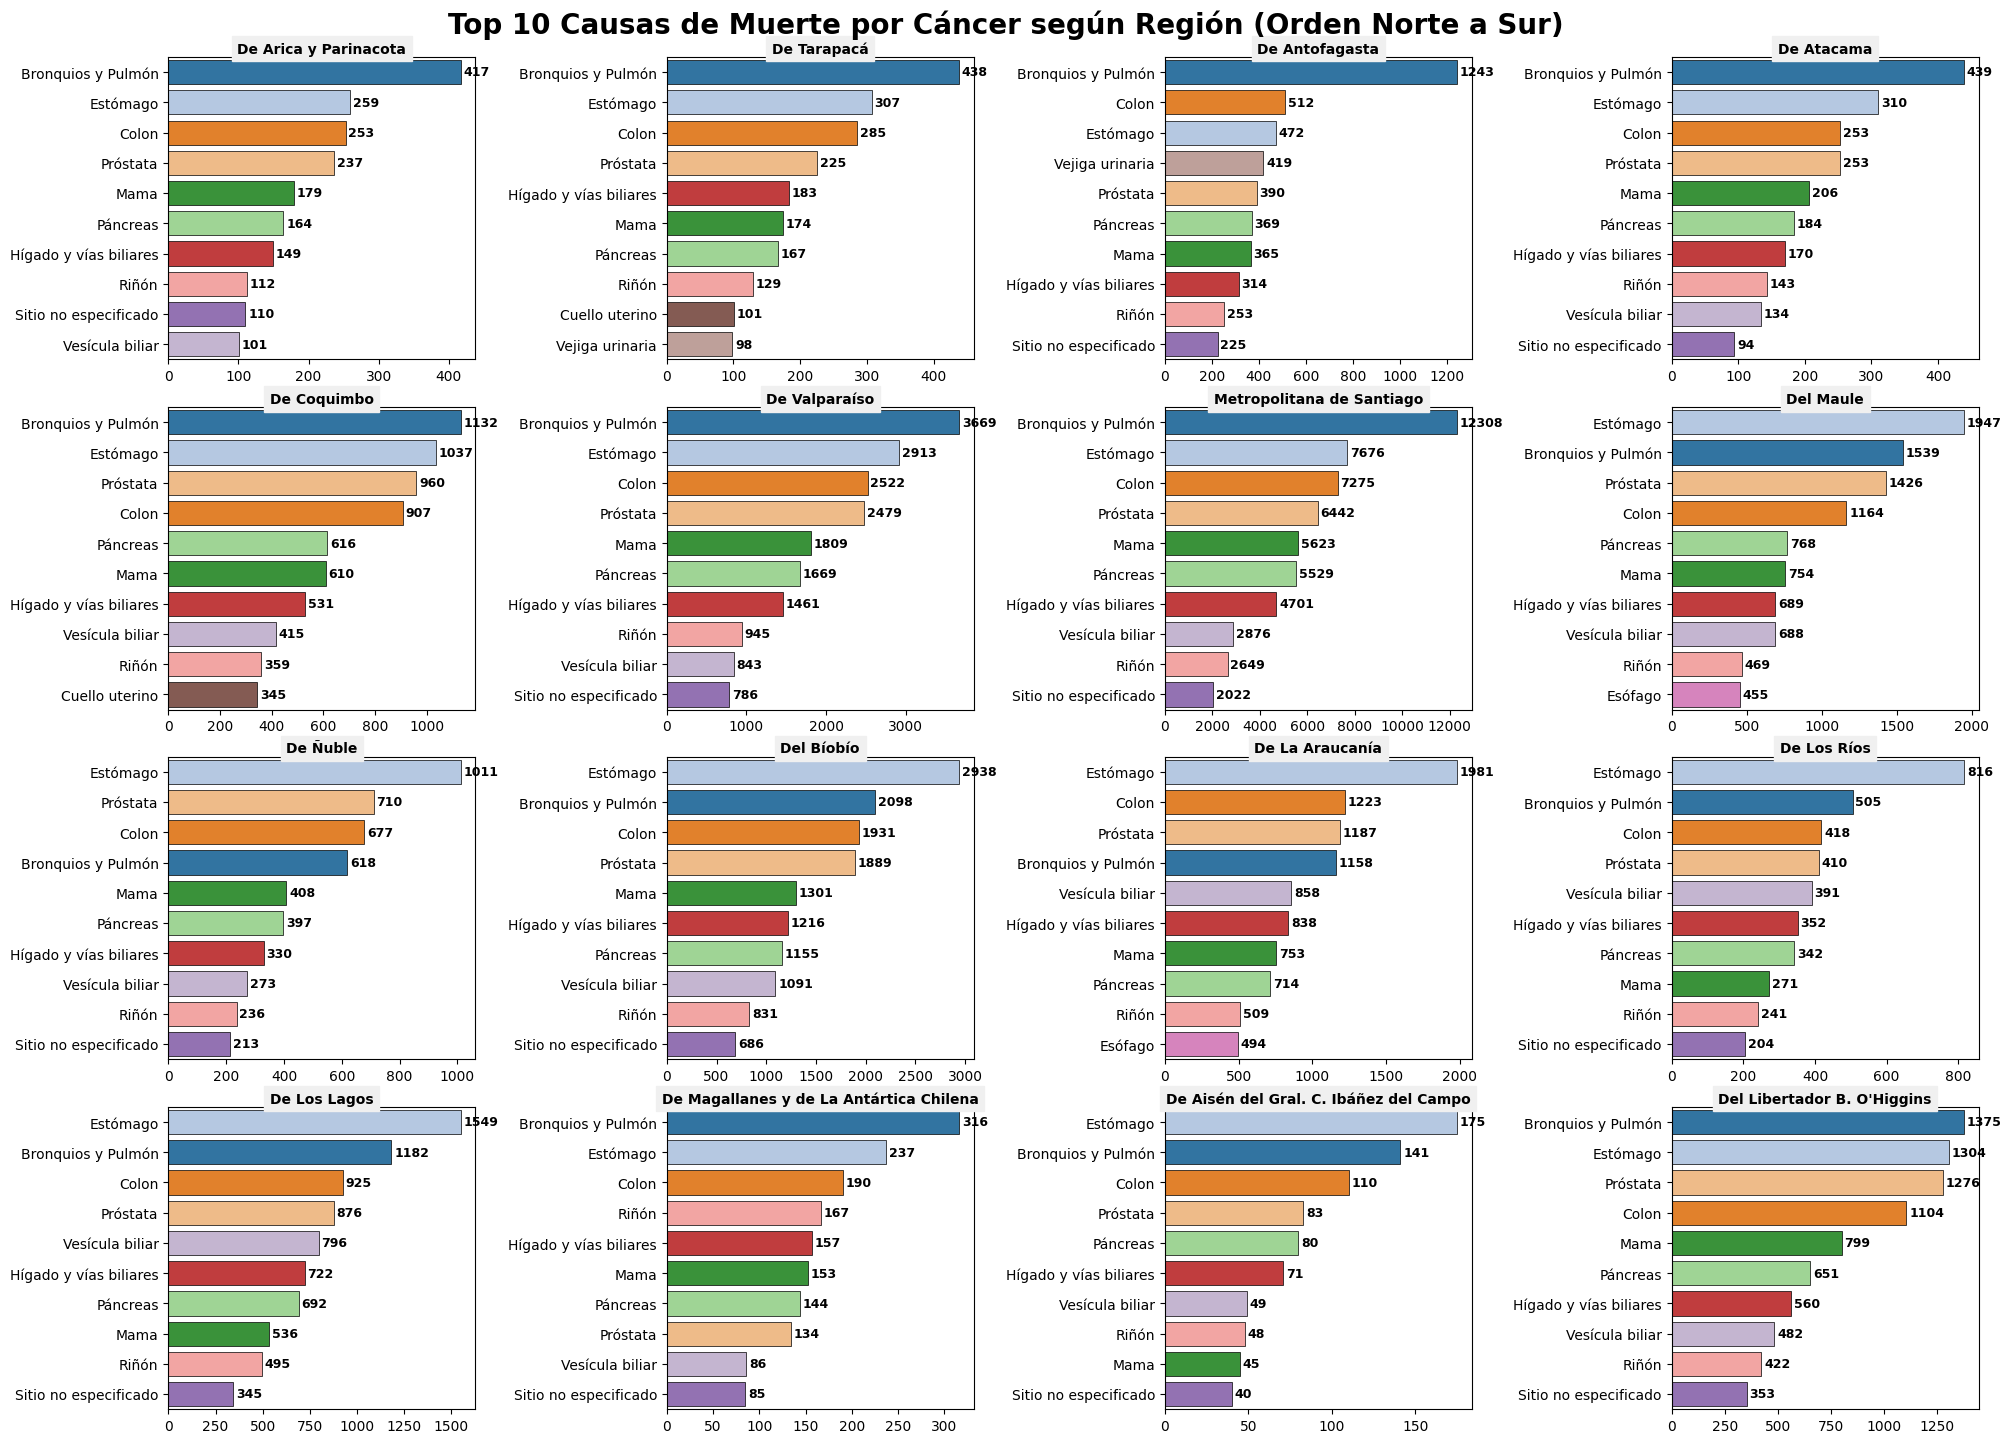

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import unicodedata
import re

# -------------------------------------------------------------------------
# 1. CONFIGURACIÓN Y DICCIONARIOS
# -------------------------------------------------------------------------

# Tu diccionario CIE-10 (Mantengo el tuyo intacto)
cie10_names = {
    'C15': 'Esófago', 'C16': 'Estómago', 'C18': 'Colon', 'C19': 'Unión rectosigmoidea',
    'C20': 'Recto', 'C22': 'Hígado y vías biliares', 'C23': 'Vesícula biliar',
    'C24': 'Otras partes vías biliares', 'C25': 'Páncreas', 'C32': 'Laringe',
    'C33': 'Tráquea', 'C34': 'Bronquios y Pulmón', 'C43': 'Melanoma de piel',
    'C44': 'Otras neoplasias de piel', 'C50': 'Mama', 'C53': 'Cuello uterino',
    'C54': 'Cuerpo uterino', 'C56': 'Ovario', 'C61': 'Próstata', 'C62': 'Testículo',
    'C64': 'Riñón', 'C67': 'Vejiga urinaria', 'C80': 'Sitio no especificado',
    'C81': 'Linfoma Hodgkin', 'C82': 'Linfoma folicular', 'C83': 'Linfoma no folicular',
    'C85': 'Linfoma no Hodgkin', 'C90': 'Mieloma múltiple', 'C91': 'Leucemia linfoide',
    'C92': 'Leucemia mieloide', 'C97': 'Sitios múltiples', 'D00': 'Carcinoma in situ'
}

# Diccionario para ordenar las regiones de Norte a Sur (Crucial para visualización)
region_rank = {
    "arica y parinacota": 1, "tarapaca": 2, "antofagasta": 3, "atacama": 4,
    "coquimbo": 5, "valparaiso": 6, "metropolitana de santiago": 7,
    "libertador general bernardo o'higgins": 8, "maule": 9, "nuble": 10,
    "biobio": 11, "la araucania": 12, "los rios": 13, "los lagos": 14,
    "aysen del general carlos ibanez del campo": 15, "magallanes y de la antartica chilena": 16
}

def clean_region_name(x):
    if pd.isna(x): return "Desconocida"
    s = str(x).lower().strip()
    s = "".join(c for c in unicodedata.normalize("NFKD", s) if not unicodedata.combining(c))
    s = re.sub(r"\s+", " ", s)
    s = re.sub(r"^(de|del)\s+", "", s)
    return s

# -------------------------------------------------------------------------
# 2. PROCESAMIENTO DE DATOS
# -------------------------------------------------------------------------

# 1. Filtrar Cáncer
df_cancer = df_mortalidad[df_mortalidad["GLOSA_CAPITULO_DIAG1"] == "Tumores [Neoplasias]"].copy()

# 2. Mapear Nombres
df_cancer['Nombre_Cancer'] = df_cancer['CODIGO_CATEGORIA_DIAG1'].map(cie10_names).fillna(df_cancer['CODIGO_CATEGORIA_DIAG1'])

# 3. Agrupar: Región -> Cáncer -> Cantidad
df_grouped = df_cancer.groupby(['NOMBRE_REGION', 'Nombre_Cancer']).size().reset_index(name='Muertes')

# 4. Crear columna de Ranking para ordenamiento
df_grouped['Region_Clean'] = df_grouped['NOMBRE_REGION'].apply(clean_region_name)
df_grouped['Rank_Geo'] = df_grouped['Region_Clean'].map(region_rank).fillna(99)

# 5. Filtrar el TOP 4 por Región
df_top4_region = (df_grouped
                  .sort_values(['Rank_Geo', 'Muertes'], ascending=[True, False])
                  .groupby('NOMBRE_REGION')
                  .head(10) # <--- AQUÍ SELECCIONAMOS LOS 4 PRINCIPALES
                  )

# -------------------------------------------------------------------------
# 3. VISUALIZACIÓN (GRID 4x4)
# -------------------------------------------------------------------------

# Lista de regiones ordenadas geográficamente
sorted_regions = df_grouped.sort_values('Rank_Geo')['NOMBRE_REGION'].unique()

# Definimos una paleta de colores consistente para los cánceres
# (Para que "Estómago" sea siempre del mismo color en todos los gráficos)
all_top_cancers = df_top4_region['Nombre_Cancer'].unique()
color_palette = dict(zip(all_top_cancers, sns.color_palette("tab20", n_colors=len(all_top_cancers))))

# Crear la figura (4 filas x 4 columnas)
fig, axes = plt.subplots(4, 4, figsize=(20, 14), constrained_layout=True)
axes_flat = axes.flatten() # Aplanamos para iterar fácil

for idx, region_name in enumerate(sorted_regions):
    if idx >= len(axes_flat): break

    ax = axes_flat[idx]

    # Datos de esa región específica
    data_local = df_top4_region[df_top4_region['NOMBRE_REGION'] == region_name]

    # Gráfico de barras
    sns.barplot(
        data=data_local,
        x='Muertes',
        y='Nombre_Cancer',
        ax=ax,
        palette=color_palette, # Usamos la paleta consistente
        hue='Nombre_Cancer',   # Requerido por seaborn nuevo para evitar warning
        dodge=False,
        edgecolor='black',
        linewidth=0.5
    )

    # Títulos y limpieza
    # Acortamos nombres largos de regiones para que quepan en el título
    short_title = region_name.replace("DEL GENERAL CARLOS IBANEZ DEL CAMPO", "").replace("DE LA ANTARTICA CHILENA", "").replace("LIBERTADOR GENERAL BERNARDO O'HIGGINS", "O'HIGGINS")
    ax.set_title(short_title, fontsize=10, fontweight='bold', pad=3, backgroundcolor='#f0f0f0')

    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.legend([],[], frameon=False) # Ocultar leyenda individual

    # Poner valores numéricos al final de las barras
    for i, container in enumerate(ax.containers):
        ax.bar_label(container, fmt='%d', padding=2, fontsize=9, fontweight='bold')

# Título General
fig.suptitle('Top 10 Causas de Muerte por Cáncer según Región (Orden Norte a Sur)',
             fontsize=20, fontweight='bold', y=1.02)

# Si sobran subplots (caso raro si son 16 regiones exactas), apagar los ejes extra
for i in range(len(sorted_regions), len(axes_flat)):
    axes_flat[i].axis('off')
plt.savefig("Top 10 Causas de Mortalidad por Cáncer por region.png", dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipython-input-3690156929.py:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(abs(x))}' for x in xticks])


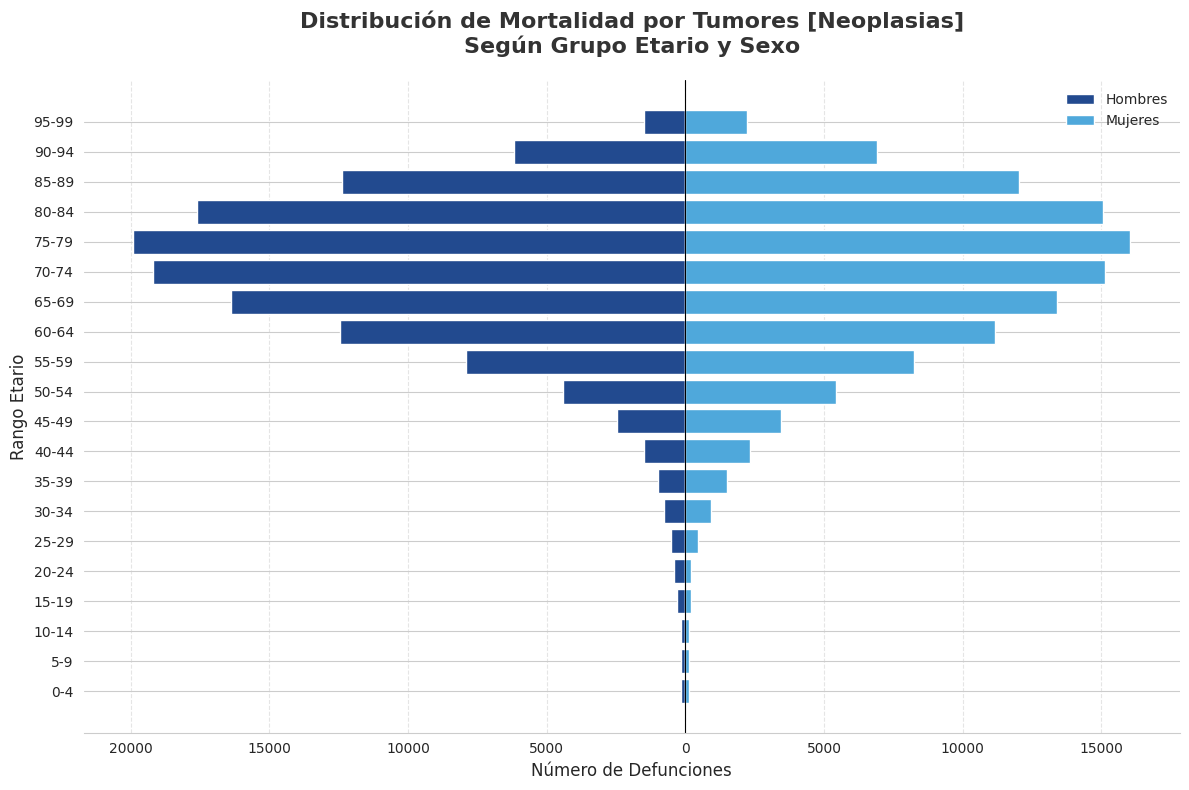

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Carga de datos (Asumiendo que df_mortalidad ya está cargado como indicaste)
# df_mortalidad = pd.read_csv('tu_archivo.csv') # Descomentar si necesitas cargar

# -------------------------------------------------------------------------
# PASO 1: PREPROCESAMIENTO CLÍNICO DE DATOS
# -------------------------------------------------------------------------

# Filtramos solo por la causa solicitada
df_cancer = df_mortalidad[df_mortalidad["GLOSA_CAPITULO_DIAG1"] == "Tumores [Neoplasias]"].copy()

# LIMPIEZA DE EDAD (Crítico en datos DEIS/INE):
# EDAD_TIPO == 1 significa Años. Si es 2, 3 o 4 son meses/días/horas (menores de 1 año).
# Convertimos todo lo que no sea TIPO 1 a 0 años para simplificar la pirámide.
df_cancer['EDAD_CALCULADA'] = np.where(df_cancer['EDAD_TIPO'] == 1,
                                       df_cancer['EDAD_CANT'],
                                       0)

# Definimos los rangos de edad (Bins) estilo INE (quinquenales)
# Creamos bins hasta los 100 años
bins = list(range(0, 105, 5))
labels = [f"{i}-{i+4}" for i in range(0, 100, 5)]

# Ajustamos la etiqueta final para 100+ (opcional, depende de tu max edad)
# Aquí cortamos en 100 para estandarizar
df_cancer['Rango_Edad'] = pd.cut(df_cancer['EDAD_CALCULADA'], bins=bins, labels=labels, right=False)

# -------------------------------------------------------------------------
# PASO 2: AGREGACIÓN DE DATOS
# -------------------------------------------------------------------------

# Agrupamos por Rango de Edad y Sexo
# Asegúrate que 'SEXO_NOMBRE' contenga 'Hombre' y 'Mujer' limpios
df_agrupado = df_cancer.groupby(['Rango_Edad', 'SEXO_NOMBRE'], observed=False).size().reset_index(name='Defunciones')

# Pivotamos para tener Hombres y Mujeres en columnas separadas
df_pivot = df_agrupado.pivot(index='Rango_Edad', columns='SEXO_NOMBRE', values='Defunciones').fillna(0)

# Ordenamos el índice de mayor a menor para que la edad 0 esté abajo en el gráfico
df_pivot = df_pivot.sort_index(ascending=True)

# -------------------------------------------------------------------------
# PASO 3: VISUALIZACIÓN (Estilo Pirámide)
# -------------------------------------------------------------------------

font_color = '#333333'
color_hombres = '#224a8f' # Azul oscuro (según tu imagen)
color_mujeres = '#4fa8db' # Azul claro (según tu imagen)

y = range(len(df_pivot.index))
hombres = df_pivot['Hombre']
mujeres = df_pivot['Mujer']

fig, ax = plt.subplots(figsize=(12, 8))

# TRUCO DE LA PIRÁMIDE:
# Hacemos los datos de hombres negativos para que vayan a la izquierda
ax.barh(y, -hombres, color=color_hombres, label='Hombres', height=0.8)
ax.barh(y, mujeres, color=color_mujeres, label='Mujeres', height=0.8)

# -------------------------------------------------------------------------
# PASO 4: ESTÉTICA Y ETIQUETAS
# -------------------------------------------------------------------------

# Eje Y Central (Las edades)
plt.yticks(y, df_pivot.index)

# Formatear eje X para que los números negativos se vean positivos
xticks = ax.get_xticks()
ax.set_xticklabels([f'{int(abs(x))}' for x in xticks])

# Líneas de referencia verticales
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_axisbelow(True)

# Títulos y Leyendas
plt.title('Distribución de Mortalidad por Tumores [Neoplasias]\nSegún Grupo Etario y Sexo',
          fontsize=16, fontweight='bold', color=font_color, pad=20)
plt.xlabel('Número de Defunciones', fontsize=12)
plt.ylabel('Rango Etario', fontsize=12)
plt.legend(loc='upper right', frameon=False)

# Eliminar bordes innecesarios (Spines)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False) # Quitamos la línea del eje Y para limpieza

# Añadir línea central divisoria
ax.axvline(0, color='black', linewidth=0.8)

plt.tight_layout()
plt.savefig("Distribución de Mortalidad por Tumores [Neoplasias]\nSegún Grupo Etario y Sexo.png", dpi=300, bbox_inches='tight')
plt.show()

Pendiente (muertes/año) ≈ 570.15
Muertes estimadas por cáncer en 2050 ≈ 46,042


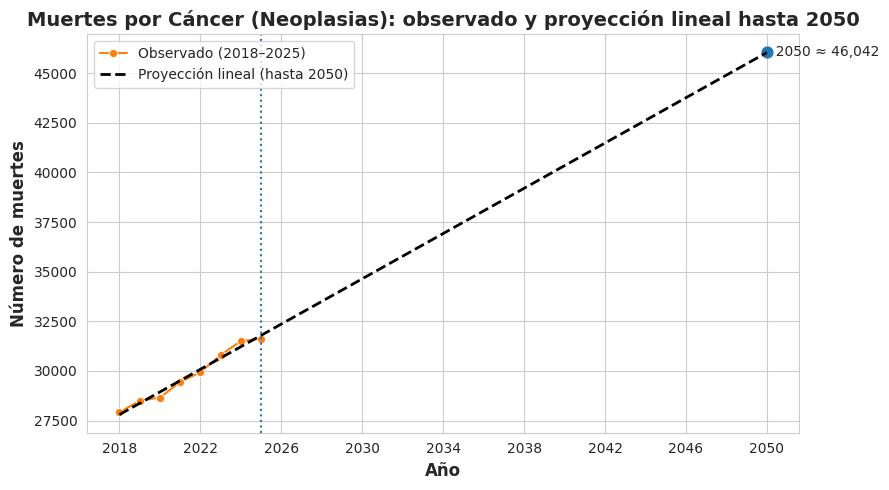

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# ------------------------------
# 1) Preparar datos (2018–2025) solo cáncer
# ------------------------------
df = df_mortalidad_filtrado.copy()
df["AÑO"] = pd.to_numeric(df["AÑO"], errors="coerce")
df = df[df["AÑO"].between(2018, 2025)].copy()

# filtro cáncer (ajusta si tu glosa exacta es distinta)
mask_cancer = df["GLOSA_CAPITULO_DIAG1"].astype(str).str.contains(
    "Tumores|Neoplasias", case=False, na=False
)
df_cancer = df[mask_cancer].copy()

tabla_cancer = (
    df_cancer.groupby("AÑO")
    .size()
    .reset_index(name="Muertes")
    .sort_values("AÑO")
)

# ------------------------------
# 2) Ajuste lineal: Muertes = m*AÑO + b
# ------------------------------
x = tabla_cancer["AÑO"].values
y = tabla_cancer["Muertes"].values
m, b = np.polyfit(x, y, 1)

# Proyección 2018–2050
years_proj = np.arange(2018, 2051)
pred_proj = m * years_proj + b

# Evitar negativos (por si alguna vez ocurriera)
pred_proj = np.clip(pred_proj, 0, None)

# Predicción puntual 2050
pred_2050 = float(np.clip(m*2050 + b, 0, None))

print(f"Pendiente (muertes/año) ≈ {m:.2f}")
print(f"Muertes estimadas por cáncer en 2050 ≈ {pred_2050:,.0f}")

# ------------------------------
# 3) Gráfico: observado vs proyectado
# ------------------------------
plt.figure(figsize=(9, 5))

# Observado (2018–2025)
sns.lineplot(
    data=tabla_cancer, x="AÑO", y="Muertes",
    marker="o", label="Observado (2018–2025)", color="tab:orange"
)

# Proyectado (2018–2050)
plt.plot(
    years_proj, pred_proj,
    linestyle="--", linewidth=2,
    label="Proyección lineal (hasta 2050)", color="black"
)

# Línea vertical separando observado vs proyección (en 2025)
plt.axvline(2025, linestyle=":", linewidth=1.5)

# Marcar el punto 2050
plt.scatter([2050], [pred_2050], s=60)
plt.text(2050, pred_2050, f"  2050 ≈ {pred_2050:,.0f}", va="center", )

plt.title(
    "Muertes por Cáncer (Neoplasias): observado y proyección lineal hasta 2050",
    fontsize=14, fontweight="bold"
)
plt.xlabel("Año", fontsize=12, fontweight="bold")
plt.ylabel("Número de muertes", fontsize=12, fontweight="bold")
plt.xticks(np.arange(2018, 2051, 4), rotation=0)

plt.legend(loc="upper left")
plt.tight_layout()
plt.savefig("proyección lineal hasta 2050.png", dpi=300, bbox_inches='tight')
plt.show()


##**CASEN 2022**

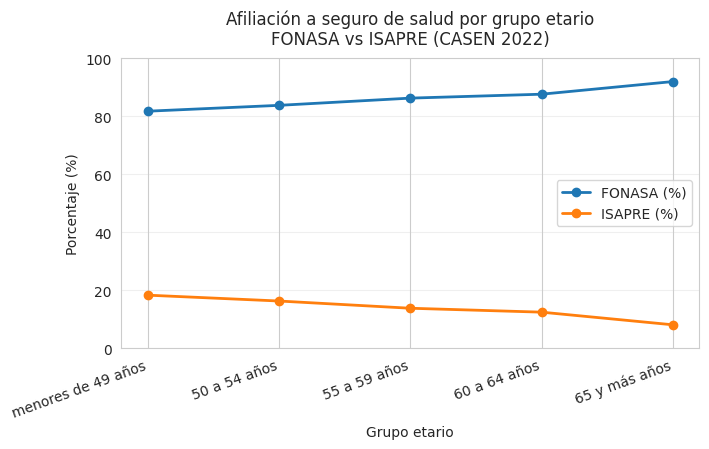

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1) Datos (porcentaje de afiliación por grupo etario)
# -------------------------------
# Fuente declarada por el gráfico: CASEN 2022
# Nota: FONASA + ISAPRE suman ~100% en cada grupo (redondeos posibles).
df_pct = pd.DataFrame([
    {"grupo_etario": "menores de 49 años", "FONASA_pct": 81.72, "ISAPRE_pct": 18.28},
    {"grupo_etario": "50 a 54 años",       "FONASA_pct": 83.74, "ISAPRE_pct": 16.26},
    {"grupo_etario": "55 a 59 años",       "FONASA_pct": 86.23, "ISAPRE_pct": 13.77},
    {"grupo_etario": "60 a 64 años",       "FONASA_pct": 87.58, "ISAPRE_pct": 12.42},
    {"grupo_etario": "65 y más años",      "FONASA_pct": 91.94, "ISAPRE_pct":  8.06},
])

# Eje X discreto (posiciones) y etiquetas legibles
x = np.arange(len(df_pct))
labels = df_pct["grupo_etario"].tolist()

# -------------------------------
# 2) Gráfico (líneas comparativas)
# -------------------------------
# Figura ligeramente más ancha para evitar “apriete” de título y etiquetas
fig, ax = plt.subplots(figsize=(7.2, 4.6))

ax.plot(
    x, df_pct["FONASA_pct"].values,
    marker="o", linewidth=2, label="FONASA (%)"
)
ax.plot(
    x, df_pct["ISAPRE_pct"].values,
    marker="o", linewidth=2, label="ISAPRE (%)"
)

# -------------------------------
# 3) Formato y estética
# -------------------------------
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=20, ha="right")

ax.set_ylabel("Porcentaje (%)")
ax.set_xlabel("Grupo etario")

# Título más preciso y estable visualmente (con salto de línea)
ax.set_title(
    "Afiliación a seguro de salud por grupo etario\n"
    "FONASA vs ISAPRE (CASEN 2022)",
    pad=10
)

ax.set_ylim(0, 100)
ax.grid(True, axis="y", alpha=0.3)
ax.legend()

plt.tight_layout()
plt.show()


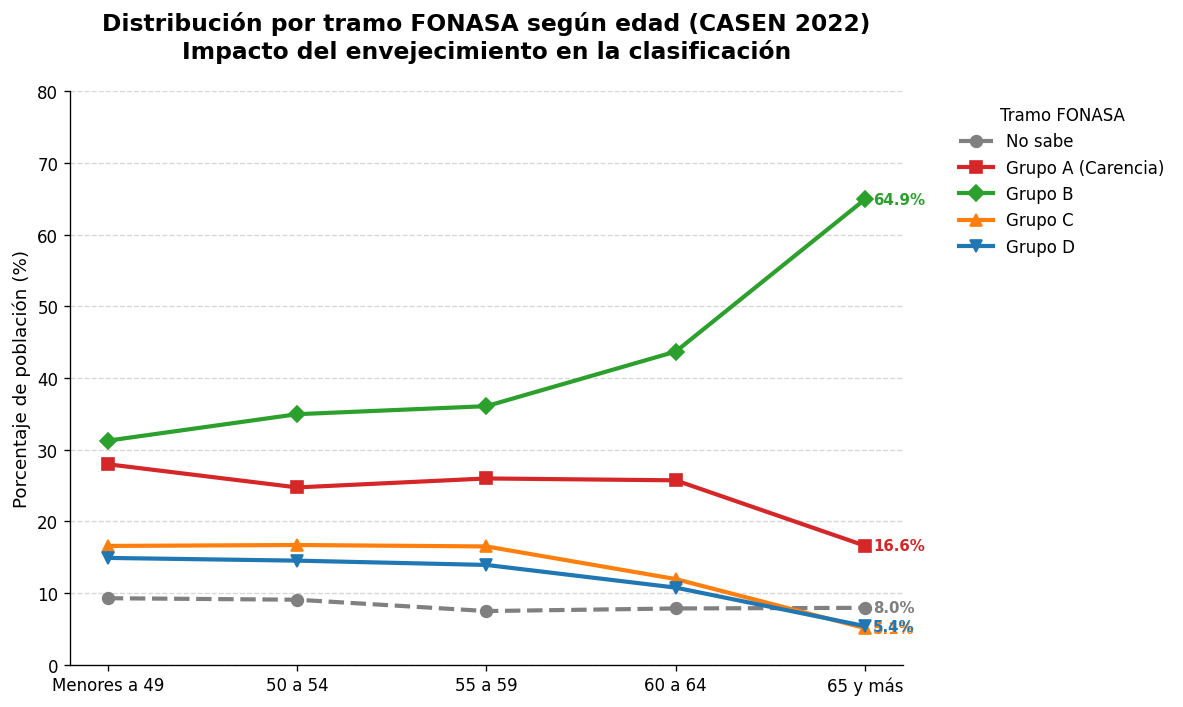

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. PREPARACIÓN DE DATOS (Tu estructura original) ---
data_full = [
    {"grupo_etario": "Menores a 49", "No_sabe_pct": 9.29, "Grupo_A_pct": 27.97, "Grupo_B_pct": 31.26, "Grupo_C_pct": 16.58, "Grupo_D_pct": 14.91},
    {"grupo_etario": "50 a 54",      "No_sabe_pct": 9.08, "Grupo_A_pct": 24.74, "Grupo_B_pct": 34.95, "Grupo_C_pct": 16.71, "Grupo_D_pct": 14.53},
    {"grupo_etario": "55 a 59",      "No_sabe_pct": 7.50, "Grupo_A_pct": 25.99, "Grupo_B_pct": 36.07, "Grupo_C_pct": 16.51, "Grupo_D_pct": 13.93},
    {"grupo_etario": "60 a 64",      "No_sabe_pct": 7.86, "Grupo_A_pct": 25.73, "Grupo_B_pct": 43.68, "Grupo_C_pct": 11.96, "Grupo_D_pct": 10.77},
    {"grupo_etario": "65 y más",     "No_sabe_pct": 7.95, "Grupo_A_pct": 16.61, "Grupo_B_pct": 64.91, "Grupo_C_pct": 5.12,  "Grupo_D_pct": 5.40},
]

df_t5_pct = pd.DataFrame(data_full)

# --- 2. CONFIGURACIÓN DEL GRÁFICO ---
# Aumentamos el ancho (10) para que las categorías respiren y el alto (6) para balancear.
fig, ax = plt.subplots(figsize=(10, 6))

# Definimos colores y marcadores para diferenciar mejor visualmente
estilos = [
    ("No_sabe_pct", "No sabe", "gray", "o", "--"),  # Gris y punteado para "No sabe"
    ("Grupo_A_pct", "Grupo A (Carencia)", "#d62728", "s", "-"), # Rojo
    ("Grupo_B_pct", "Grupo B", "#2ca02c", "D", "-"), # Verde
    ("Grupo_C_pct", "Grupo C", "#ff7f0e", "^", "-"), # Naranja
    ("Grupo_D_pct", "Grupo D", "#1f77b4", "v", "-"), # Azul
]

x = np.arange(len(df_t5_pct["grupo_etario"]))

# --- 3. PLOTEO Y ANOTACIONES ---
for col, label, color, marker, ls in estilos:
    y_vals = df_t5_pct[col].values

    # Dibujar la línea
    ax.plot(x, y_vals, marker=marker, linestyle=ls, linewidth=2.5, label=label, color=color, markersize=7)

    # Añadir etiquetas de valor en los puntos (opcional pero recomendado para reportes)
    # Solo etiquetamos el primero y el último punto para no saturar, o todos si prefieres.
    # Aquí etiqueto el último punto para ver el resultado final en 65+ años.
    ax.annotate(f"{y_vals[-1]:.1f}%",
                xy=(x[-1], y_vals[-1]),
                xytext=(5, 0), textcoords="offset points",
                va="center", color=color, fontweight='bold', fontsize=9)

# --- 4. FORMATO Y ESTÉTICA ---
ax.set_xticks(x)
ax.set_xticklabels(df_t5_pct["grupo_etario"], rotation=0, fontsize=10) # Rotación 0 es más legible si hay espacio
ax.set_ylabel("Porcentaje de población (%)", fontsize=11)
ax.set_title("Distribución por tramo FONASA según edad (CASEN 2022)\nImpacto del envejecimiento en la clasificación",
             fontsize=14, fontweight='bold', pad=20)

# Limites y Grilla
ax.set_ylim(0, 80) # Ajustado a 80 ya que el máximo es 65%, 100 deja mucho espacio vacío
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Quitar bordes innecesarios (estilo Tufte)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Leyenda fuera del gráfico para no tapar datos
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False, title="Tramo FONASA")

plt.tight_layout()
plt.show()

In [11]:
df

,Categoría,Desagregación,2006,2009,2011,2013,2015,2017,2020,2022,2024
0,I,Sistema Público FONASA,"44,134","37,817","25,612","27,670","34,146","25,643","15,682","23,534","23,308"
1,I,Isapre,326,206,253,425,461,472,640,365,268
2,I,FF.AA. y del Orden,76,130,97,119,121,168,122,100,60
3,I,Ninguno (particular),"1,474",761,549,691,826,704,"1,349",558,455
4,I,Otro sistema,135,155,127,147,137,217,210,95,53
5,I,No sabe,268,425,176,468,579,670,291,234,91
6,II,Sistema Público FONASA,"37,624","35,580","24,025","28,195","34,417","26,520","23,152","26,363","28,884"
7,II,Isapre,320,277,280,425,648,452,472,378,275
8,II,FF.AA. y del Orden,182,103,117,172,217,213,189,167,171
9,II,Ninguno (particular),"1,550",902,611,745,945,658,"1,713",808,657


/tmp/ipython-input-429495382.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_plot.groupby(["categoria", "sistema_fusion"], as_index=False)[year]


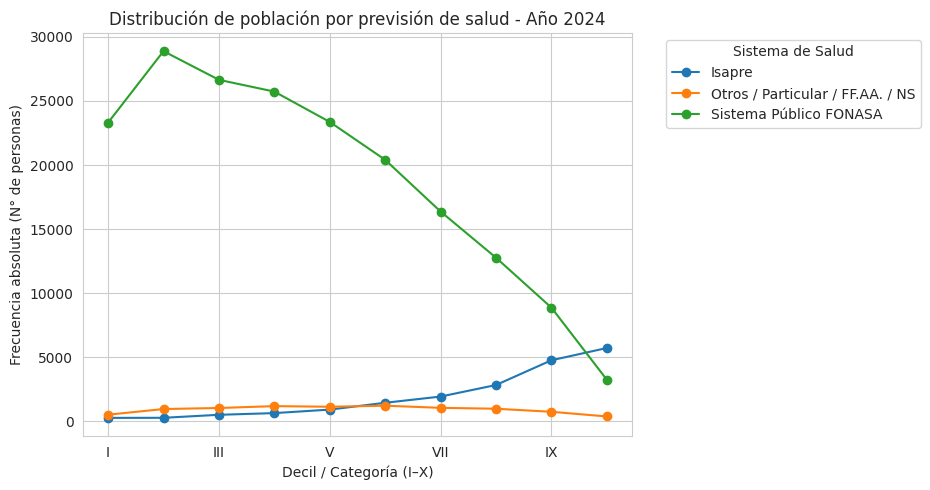

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# Configuración global
# -------------------------------
year = "2024"  # Período de análisis seleccionado

# -------------------------------
# 1) Carga y normalización de datos
# -------------------------------
data = [
    ["I", "Sistema Público FONASA", 44134, 37817, 25612, 27670, 34146, 25643, 15682, 23534, 23308],
    ["I", "Isapre", 326, 206, 253, 425, 461, 472, 640, 365, 268],
    ["I", "FF.AA. y del Orden", 761, 309, 711, 912, 1168, 1221, 100, 603, 1],
    ["I", "Ninguno (particular)", 1474, 761, 549, 691, 826, 704, 1349, 558, 455],
    ["I", "Otro sistema", 135, 155, 127, 147, 137, 217, 210, 95, 53],
    ["I", "No sabe", 268, 425, 176, 468, 579, 670, 291, 234, 9],
    ["II", "Sistema Público FONASA", 37624, 35580, 24025, 28195, 34417, 26520, 23152, 26363, 28884],
    ["II", "Isapre", 320, 277, 280, 425, 648, 452, 472, 378, 275],
    ["II", "FF.AA. y del Orden", 182, 103, 117, 172, 217, 213, 189, 167, 171],
    ["II", "Ninguno (particular)", 1550, 902, 611, 745, 945, 658, 1713, 808, 657],
    ["II", "Otro sistema", 83, 115, 80, 159, 174, 200, 290, 90, 44],
    ["II", "No sabe", 317, 507, 191, 442, 496, 574, 387, 225, 87],
    ["III", "Sistema Público FONASA", 32819, 31014, 23285, 24459, 30241, 25004, 22407, 24779, 26648],
    ["III", "Isapre", 561, 479, 493, 707, 1009, 765, 680, 547, 509],
    ["III", "FF.AA. y del Orden", 249, 195, 210, 341, 288, 294, 240, 288, 296],
    ["III", "Ninguno (particular)", 1539, 851, 619, 744, 960, 732, 1481, 711, 606],
    ["III", "Otro sistema", 127, 97, 136, 185, 156, 186, 222, 95, 60],
    ["III", "No sabe", 322, 483, 269, 486, 555, 669, 376, 215, 77],
    ["IV", "Sistema Público FONASA", 28493, 27320, 20509, 23403, 27488, 21996, 18776, 22571, 25729],
    ["IV", "Isapre", 861, 759, 720, 935, 1327, 998, 732, 757, 641],
    ["IV", "FF.AA. y del Orden", 339, 264, 295, 368, 556, 417, 278, 368, 399],
    ["IV", "Ninguno (particular)", 1519, 806, 687, 740, 917, 686, 1079, 586, 647],
    ["IV", "Otro sistema", 92, 120, 102, 187, 164, 174, 162, 78, 57],
    ["IV", "No sabe", 391, 567, 231, 470, 576, 624, 288, 203, 83],
    ["V", "Sistema Público FONASA", 23899, 24524, 18822, 20097, 24833, 19753, 17863, 20116, 23363],
    ["V", "Isapre", 1066, 1072, 1023, 1377, 1822, 1273, 1040, 1051, 915],
    ["V", "FF.AA. y del Orden", 465, 441, 324, 545, 691, 598, 422, 458, 451],
    ["V", "Ninguno (particular)", 1471, 928, 630, 767, 902, 653, 863, 580, 538],
    ["V", "Otro sistema", 103, 119, 110, 181, 96, 184, 165, 88, 53],
    ["V", "No sabe", 373, 559, 266, 435, 537, 619, 284, 211, 95],
    ["VI", "Sistema Público FONASA", 19858, 20139, 16444, 17984, 21275, 17513, 15474, 18116, 20406],
    ["VI", "Isapre", 1580, 1288, 1420, 2048, 2632, 2075, 1501, 1556, 1446],
    ["VI", "FF.AA. y del Orden", 664, 516, 451, 586, 796, 664, 416, 531, 607],
    ["VI", "Ninguno (particular)", 1314, 703, 617, 691, 887, 687, 672, 526, 488],
    ["VI", "Otro sistema", 61, 119, 129, 184, 125, 168, 128, 61, 34],
    ["VI", "No sabe", 378, 489, 235, 480, 508, 636, 227, 171, 91],
    ["VII", "Sistema Público FONASA", 16519, 15855, 14082, 14614, 17157, 14564, 13667, 15362, 16371],
    ["VII", "Isapre", 2165, 1845, 2176, 2385, 3373, 2527, 2415, 2184, 1932],
    ["VII", "FF.AA. y del Orden", 808, 639, 560, 795, 857, 711, 500, 523, 622],
    ["VII", "Ninguno (particular)", 1309, 751, 591, 573, 781, 564, 516, 503, 341],
    ["VII", "Otro sistema", 108, 68, 88, 200, 91, 171, 145, 56, 32],
    ["VII", "No sabe", 356, 466, 287, 363, 471, 519, 243, 158, 57],
    ["VIII", "Sistema Público FONASA", 12301, 11871, 12375, 11670, 13468, 11063, 10376, 10701, 12769],
    ["VIII", "Isapre", 2889, 2381, 3318, 3752, 4694, 3599, 3451, 2928, 2833],
    ["VIII", "FF.AA. y del Orden", 874, 645, 856, 857, 913, 696, 604, 477, 666],
    ["VIII", "Ninguno (particular)", 1109, 597, 629, 571, 692, 502, 345, 318, 237],
    ["VIII", "Otro sistema", 85, 76, 107, 137, 105, 141, 106, 41, 28],
    ["VIII", "No sabe", 317, 407, 266, 380, 391, 447, 141, 129, 51],
    ["IX", "Sistema Público FONASA", 8176, 7995, 8155, 7855, 8920, 7787, 6471, 7193, 8872],
    ["IX", "Isapre", 4141, 3301, 4985, 5364, 6848, 5856, 5655, 4563, 4764],
    ["IX", "FF.AA. y del Orden", 752, 655, 809, 741, 823, 722, 470, 470, 545],
    ["IX", "Ninguno (particular)", 939, 582, 499, 493, 642, 423, 254, 209, 143],
    ["IX", "Otro sistema", 66, 62, 95, 126, 115, 117, 92, 30, 25],
    ["IX", "No sabe", 217, 292, 207, 305, 226, 301, 109, 66, 31],
    ["X", "Sistema Público FONASA", 3833, 2980, 3122, 2623, 3588, 3122, 2422, 2553, 3250],
    ["X", "Isapre", 5206, 3658, 5939, 5691, 8979, 7646, 6537, 5702, 5720],
    ["X", "FF.AA. y del Orden", 384, 288, 440, 364, 517, 431, 259, 222, 272],
    ["X", "Ninguno (particular)", 547, 342, 286, 249, 359, 268, 148, 92, 84],
    ["X", "Otro sistema", 69, 44, 63, 81, 108, 80, 84, 29, 18],
    ["X", "No sabe", 91, 152, 80, 101, 87, 130, 56, 22, 5],
]

columns = ["Categoría", "Desagregación", "2006", "2009", "2011", "2013", "2015", "2017", "2020", "2022", "2024"]

df = pd.DataFrame(data, columns=columns)

# Estandarización de nombres de columnas para facilitar la manipulación de atributos
df_plot = df.rename(columns={"Categoría": "categoria", "Desagregación": "sistema"}).copy()

# Tratamiento de datos numéricos:
# - Se eliminan separadores de miles para asegurar la conversión.
# - Se utiliza 'coerce' para gestionar valores no numéricos como NaN.
df_plot[year] = pd.to_numeric(
    df_plot[year].astype(str).str.replace(",", "", regex=False),
    errors="coerce"
)

# -------------------------------
# 2) Definición del orden categórico
# -------------------------------
# Se establece un orden ordinal para el eje X (I al X) para evitar el ordenamiento alfanumérico predeterminado.
order_cat = ["I", "II", "III", "IV", "V", "VI", "VII", "VIII", "IX", "X"]
df_plot["categoria"] = pd.Categorical(df_plot["categoria"], categories=order_cat, ordered=True)

# -------------------------------
# 3) Consolidación de sistemas minoritarios
# -------------------------------
# Se agrupan sistemas con menor representatividad para reducir el ruido visual y mejorar la interpretación.
merge_set = {
    "Ninguno (particular)",
    "Otro sistema",
    "No sabe",
    "FF.AA. y del Orden",
}

# Aplicación de máscara para etiquetar el grupo consolidado
df_plot["sistema_fusion"] = df_plot["sistema"].where(
    ~df_plot["sistema"].isin(merge_set),
    "Otros / Particular / FF.AA. / NS"
)

# Agregación de valores por categoría y sistema tras la fusión de etiquetas
df_y = (
    df_plot.groupby(["categoria", "sistema_fusion"], as_index=False)[year]
           .sum()
           .sort_values("categoria")
)

# Reestructuración a formato "wide" (pivoteo) para facilitar la representación gráfica
wide = df_y.pivot(index="categoria", columns="sistema_fusion", values=year)

# -------------------------------
# 4) Visualización
# -------------------------------
ax = wide.plot(marker="o", figsize=(9.5, 5))

ax.set_xlabel("Decil / Categoría (I–X)")
ax.set_ylabel("Frecuencia absoluta (N° de personas)")
ax.set_title(f"Distribución de población por previsión de salud - Año {year}")

# Desactivar notación científica en el eje Y para mejorar la legibilidad clínica/administrativa
ax.ticklabel_format(style="plain", axis="y")

plt.xticks(rotation=0)
plt.legend(title="Sistema de Salud", bbox_to_anchor=(1.05, 1), loc='upper left') # Opcional: mejora la posición de la leyenda
plt.tight_layout()
plt.show()